# Project: Plant Seedlings Classicication.

### Context

- Can you differentiate a weed from a crop seedling
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data
- The dataset has to be downloaded from the above Kagglewebsite.



### Objective:
- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this process you shouldalso be capable to handle real image files, not just limited to a numpy array of image pixels.

###Steps and tasks:
1.Importthe libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2.Data Pre-processing: (15 Marks)
a.Normalization.
b.Gaussian Blurring.
c.Visualize data after pre-processing.

3.Make data compatible: (10 Marks)

a.Convert labelsto one-hot-vectors.
b.Print the label for y_train[0].
c.Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
d.Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

4.Building CNN: (15 Marks)a.Define layers.b.Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

5.Fit and evaluate modeland print confusion matrix. (10 Marks)

6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)Note: D

# Import Libraries and Data Load

In [27]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
base_path = '/content/drive/My Drive/'
train_path = base_path+"data/plant-seedlings-classification.zip"
extract_path = base_path+'data/Extracted/' # To extract the above seeding classification zip
save_extracted = base_path+'data/Save/'

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
!mkdir extract_path

mkdir: cannot create directory ‘extract_path’: File exists


# Unziping train file:

In [23]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall(extract_path)

In [53]:
# Extract Image and Label
def get_data(path):
  files = glob(path)

  trainImg = []                                              # Initialize empty list to store the image data as numbers.
  trainLabel = []                                            # Initialize empty list to store the labels of images
  j = 1
  num = len(files)
  print("Total #:",num)
  # Obtain images and resizing, obtain labels
  for img in files:
      '''
      Append the image data to trainImg list.
      Append the labels to trainLabel list.
      '''
      print(str(j) + "/" + str(num))
      trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
      trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
      j += 1

  trainImg = np.asarray(trainImg)  # Train images set
  trainLabel = pd.DataFrame(trainLabel)  # Train labels set
  return (trainImg, trainLabel)

# Extract Train dataset
path = extract_path+"train/*/*.png"     # The path to all images in training set. (* means include all folders and files.)
print('reading data from:',path)
trainImg, trainLabel = get_data(path)

reading data from: /content/drive/My Drive/data/Extracted/train/*/*.png
Total #: 4750
1/4750
2/4750
3/4750
4/4750
5/4750
6/4750
7/4750
8/4750
9/4750
10/4750
11/4750
12/4750
13/4750
14/4750
15/4750
16/4750
17/4750
18/4750
19/4750
20/4750
21/4750
22/4750
23/4750
24/4750
25/4750
26/4750
27/4750
28/4750
29/4750
30/4750
31/4750
32/4750
33/4750
34/4750
35/4750
36/4750
37/4750
38/4750
39/4750
40/4750
41/4750
42/4750
43/4750
44/4750
45/4750
46/4750
47/4750
48/4750
49/4750
50/4750
51/4750
52/4750
53/4750
54/4750
55/4750
56/4750
57/4750
58/4750
59/4750
60/4750
61/4750
62/4750
63/4750
64/4750
65/4750
66/4750
67/4750
68/4750
69/4750
70/4750
71/4750
72/4750
73/4750
74/4750
75/4750
76/4750
77/4750
78/4750
79/4750
80/4750
81/4750
82/4750
83/4750
84/4750
85/4750
86/4750
87/4750
88/4750
89/4750
90/4750
91/4750
92/4750
93/4750
94/4750
95/4750
96/4750
97/4750
98/4750
99/4750
100/4750
101/4750
102/4750
103/4750
104/4750
105/4750
106/4750
107/4750
108/4750
109/4750
110/4750
111/4750
112/4750
113/4750
114/4

In [54]:
print(f"Training image array shape:{trainImg.shape}")
print(f"Training target labels:{trainLabel.shape}")

Training image array shape:(4750, 128, 128, 3)
Training target labels:(4750, 1)


Storing the data into file to save the time in extract and read

In [49]:
# Save data to file 
np.save(save_extracted+'trainImg.npy', trainImg)
np.save(save_extracted+'trainLabel.npy', trainLabel)

In [50]:
# Load data to file
trainImg = np.load(save_extracted+'trainImg.npy')
trainLabel = np.load(save_extracted+'trainLabel.npy', False, True)

trainImg.shape, trainLabel.shape

((4750, 128, 128, 3), (4750, 1))

# EDA

#### Explore the data by visualizing it from various categories

Image name:Black-grass


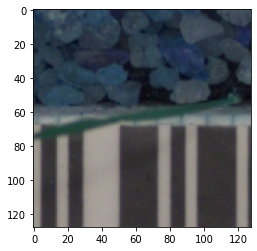

In [51]:
# Check Images
i = 0
img = trainImg[i]
label = trainLabel[0][i]
print(f'Image name:{label}')
plt.imshow(img)

Image name:Charlock


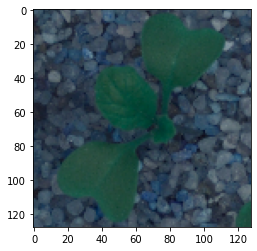

In [135]:
i = 500
img = trainImg[i]
label = trainLabel[0][i]
print(f'Image name:{label}')
plt.imshow(img)

Image name:Common Chickweed


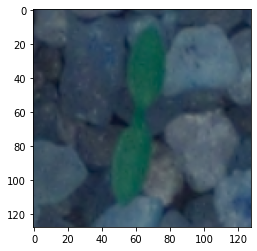

In [136]:
i = 1000
img = trainImg[i]
label = trainLabel[0][i]
print(f'Image name:{label}')
plt.imshow(img)

* Few training image has less quality, but it might overcome in pre-processing 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


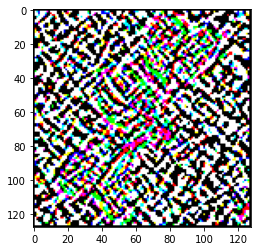

In [55]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

# Pre-processing

### Normalize the Data
* The Data (Train image and testing image) needs to be normalized to 0-1 by diving the values by 255

In [56]:
trainImg = trainImg.astype('float32')
trainImg /= 255
# Check the nomalized data
print(f'Shape of the Train array:{trainImg.shape}')
print(f'Minimum value in the Train Array:{trainImg.min()}')
print(f'Maximum value in the Train Array:{trainImg.max()}')


Shape of the Train array:(4750, 128, 128, 3)
Minimum value in the Train Array:0.0
Maximum value in the Train Array:1.0


### Split the dataset
Split the dataset into training, testing, and validation set.
(Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

In [57]:
# Step#1: Split train and test set
X_train, X_test, y_train, y_test = train_test_split(trainImg, trainLabel, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [72]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [58]:
# Step#2: Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

### One Hot encoding to target values

In [59]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)

* There is an alternate way to convert the target variable to one-hot
1. Convert String categorical to numeric
2. Use *tensorflow.keras.utils.to_categorical* to convert to binary array

In [60]:
# Display target variable
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### Gaussian Blurring
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. 

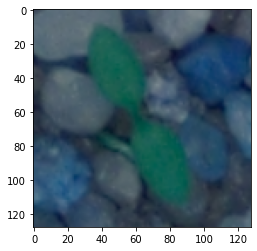

In [61]:
# Preview the image before Gaussian Blur
plt.imshow(X_train[1], cmap='gray')

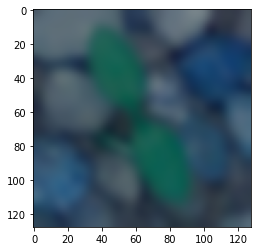

In [62]:
plt.imshow(cv2.GaussianBlur(X_train[1], (15,15), 0))

In [65]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

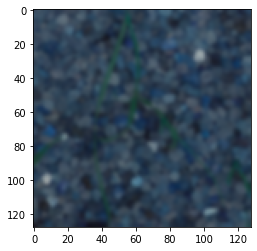

In [64]:
# Preview the image after Gaussian Blur
plt.imshow(X_train[0], cmap='gray')

In [67]:
# Gaussian Blue to Test and Validation sets
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

for idx, img in enumerate(X_validation):
  X_validation[idx] = cv2.GaussianBlur(img, (5, 5), 0)

# Create a Model

Steps:


1. Initialize CNN Classifier
2. Add Convolution layer with 32 kernels of 3x3 shape
3. Add Maxpooling layer of size 2x2
4. Flatten the input array
5. Add dense layer with relu activation function
6. Dropout the probability 
7. Add softmax Dense layer as output



In [68]:
def create_model(input_shape, num_classes):
  # Initialize CNN Classified
  model = Sequential()

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(32, (3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Flatten the 2D array to 1D array
  model.add(Flatten())

  # Create fully connected layers with 512 units
  model.add(Dense(512, activation=tf.nn.relu))
  model.add(Dropout(0.5))


  # Adding a fully connected layer with 128 neurons
  model.add(Dense(units = 128, activation = tf.nn.relu))
  model.add(Dropout(0.5))

  # The final output layer with 12 neurons to predict the categorical classifcation
  model.add(Dense(units = num_classes, activation = tf.nn.softmax))
  return model

* **Sequential:** Defines a Sequence of layers
* **Conv2D:** Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
* **MaxPool2D:** The objective is to down-sample an input representation
* **Flatten:** Convert the 2D to 1D array
* **Dense:** Adds a layers of neurons
* **Activation Functions:**:


> **Relu:** Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

> **Softmax:** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!




In [69]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

In [70]:
input_shape = X_train.shape[1:] # Input shape of X_train
num_classes = y_train.shape[1] # Target column size

model = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer
# optimizer = tf.keras.optimizers.SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [71]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=100, callbacks=[callbacks])

Epoch 1/30
34/34 [==============================] - 2s 69ms/step - loss: 2.4451 - accuracy: 0.1191 - val_loss: 2.4506 - val_accuracy: 0.1501
Epoch 2/30
34/34 [==============================] - 2s 55ms/step - loss: 2.3820 - accuracy: 0.1564 - val_loss: 2.2336 - val_accuracy: 0.2679
Epoch 3/30
34/34 [==============================] - 2s 56ms/step - loss: 2.0978 - accuracy: 0.3140 - val_loss: 1.8092 - val_accuracy: 0.4095
Epoch 4/30
34/34 [==============================] - 2s 56ms/step - loss: 1.8367 - accuracy: 0.3723 - val_loss: 1.6054 - val_accuracy: 0.4642
Epoch 5/30
34/34 [==============================] - 2s 56ms/step - loss: 1.6576 - accuracy: 0.4214 - val_loss: 1.4744 - val_accuracy: 0.5091
Epoch 6/30
34/34 [==============================] - 2s 55ms/step - loss: 1.5499 - accuracy: 0.4656 - val_loss: 1.3364 - val_accuracy: 0.5624
Epoch 7/30
34/34 [==============================] - 2s 55ms/step - loss: 1.3710 - accuracy: 0.5281 - val_loss: 1.1431 - val_accuracy: 0.6269
Epoch 8/30
34

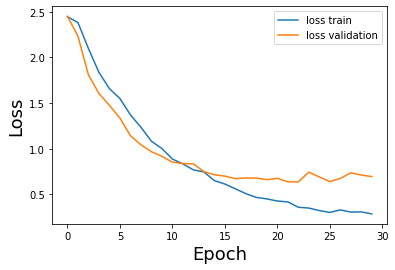

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('loss train','loss validation'), loc=0)

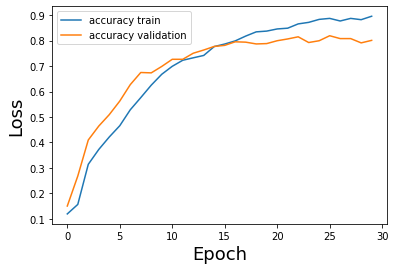

In [74]:

# Print accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('accuracy train','accuracy validation'), loc=0)

# Model Evaluation

In [75]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss: {:.2f} \n Test accuracy: {:.2f}'.format(loss, accuracy))

loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss: {:.2f} \n Train accuracy: {:.2f}'.format(loss, accuracy))

23/23 [==============================] - 0s 10ms/step - loss: 0.8251 - accuracy: 0.7879
Test loss: 0.83 
 Test accuracy: 0.79
104/104 [==============================] - 1s 8ms/step - loss: 0.1150 - accuracy: 0.9606
Train loss: 0.12 
 Train accuracy: 0.96


* Model is overfitting since training accuracy is 95% and testing accuracy is 81%. let's stop it before 18 epoch

# Model Retrain

In [76]:
model1 = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer

model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)       

In [77]:
history = model1.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=18, callbacks=[callbacks])

Epoch 1/18
104/104 [==============================] - 3s 25ms/step - loss: 2.4520 - accuracy: 0.1200 - val_loss: 2.4245 - val_accuracy: 0.1487
Epoch 2/18
104/104 [==============================] - 2s 22ms/step - loss: 2.4120 - accuracy: 0.1492 - val_loss: 2.3000 - val_accuracy: 0.2707
Epoch 3/18
104/104 [==============================] - 2s 22ms/step - loss: 2.0339 - accuracy: 0.3176 - val_loss: 1.6797 - val_accuracy: 0.4488
Epoch 4/18
104/104 [==============================] - 2s 22ms/step - loss: 1.7220 - accuracy: 0.4054 - val_loss: 1.4493 - val_accuracy: 0.5077
Epoch 5/18
104/104 [==============================] - 2s 22ms/step - loss: 1.5558 - accuracy: 0.4626 - val_loss: 1.3058 - val_accuracy: 0.5849
Epoch 6/18
104/104 [==============================] - 2s 22ms/step - loss: 1.4158 - accuracy: 0.5122 - val_loss: 1.1399 - val_accuracy: 0.6410
Epoch 7/18
104/104 [==============================] - 2s 22ms/step - loss: 1.2004 - accuracy: 0.5832 - val_loss: 0.9538 - val_accuracy: 0.7097

In [78]:
loss, accuracy = model1.evaluate(X_test, y_test)
print('Test loss: {:.2f} \n Test accuracy: {:.2f}'.format(loss, accuracy))

loss, accuracy = model1.evaluate(X_train, y_train)
print('Train loss: {:.2f} \n Train accuracy: {:.2f}'.format(loss, accuracy))

23/23 [==============================] - 0s 9ms/step - loss: 0.7679 - accuracy: 0.7556
Test loss: 0.77 
 Test accuracy: 0.76
104/104 [==============================] - 1s 9ms/step - loss: 0.2530 - accuracy: 0.9110
Train loss: 0.25 
 Train accuracy: 0.91


* The early stopping helping model to balance accuracy b/w test and training. Let's save the mode for future re-training

In [79]:
from keras.models import load_model
model.save(save_extracted+'final_model.h5')

In [80]:
model.load_weights(save_extracted+'final_model.h5')

### Confusion matrix

In [81]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5) 

In [92]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

=== Confusion Matrix ===
[[ 20   0   0   0   1   1  20   0   0   0   0   0]
 [  3  53   1   0   0   0   0   0   0   0   0   0]
 [  5   1  35   0   0   0   0   0   3   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0   0   1]
 [ 18   0   2   0   3   1   5   0   0   0   0   1]
 [  9   1   7   4   0  43   0   0   1   1   1   1]
 [ 19   0   0   0   0   3  66   0   2   0   1   1]
 [  7   2   0   1   0   0   0  30   0   0   1   0]
 [  9   3   0   2   0   0   1   1  40   0   1   7]
 [  5   0   0   5   0   0   0   0   5  16   0   0]
 [  0   1   1   0   0   0   0   0   2   0  71   1]
 [  6   0   1   1   0   4   1   0   3   0   4  42]]


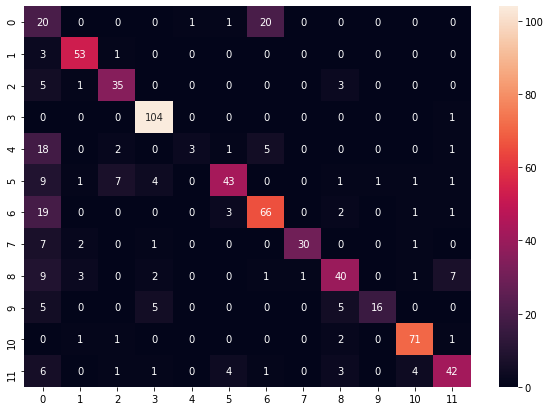

In [93]:
df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

* **Precision**: Out of all the positive classes we have predicted correctly, how many are actually positive.
* **Recall**: Out of all the positive classes, how much we predicted correctly. It should be high as possible.
* **F1-Score**: F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution

### Visualize predictions

Predicted label: Small-flowered Cranesbill


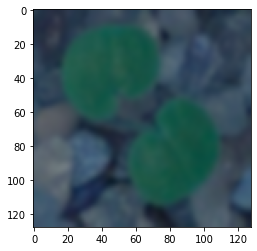

In [94]:
y_pred = encoder.inverse_transform(y_pred)

index = 2
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


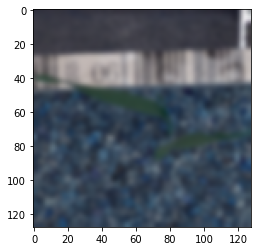

In [95]:
index = 3
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common Chickweed


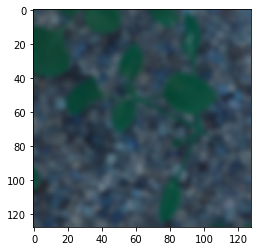

In [96]:
index = 33
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common Chickweed


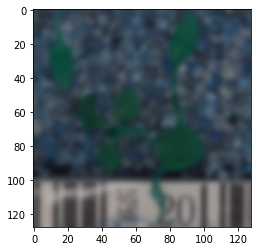

In [97]:
index = 36
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Charlock


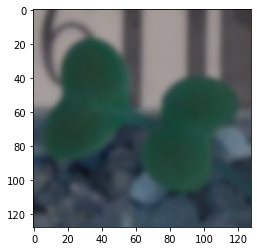

In [98]:
index = 59
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

# [Add on] Predict the Label for Test test in the original dataset

### Unzipping Prediction files & Normalize it:

In [120]:
# Extract Train dataset
path = extract_path+"test/*/*.png"  # The path to all images in test set.
predictionImg, predictionLabel = get_data(path)

# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
#from zipfile import ZipFile
#with ZipFile(train_path, 'r') as zip:
 # zip.extractall(extract_path +"test")

Total #: 4750
1/4750
2/4750
3/4750
4/4750
5/4750
6/4750
7/4750
8/4750
9/4750
10/4750
11/4750
12/4750
13/4750
14/4750
15/4750
16/4750
17/4750
18/4750
19/4750
20/4750
21/4750
22/4750
23/4750
24/4750
25/4750
26/4750
27/4750
28/4750
29/4750
30/4750
31/4750
32/4750
33/4750
34/4750
35/4750
36/4750
37/4750
38/4750
39/4750
40/4750
41/4750
42/4750
43/4750
44/4750
45/4750
46/4750
47/4750
48/4750
49/4750
50/4750
51/4750
52/4750
53/4750
54/4750
55/4750
56/4750
57/4750
58/4750
59/4750
60/4750
61/4750
62/4750
63/4750
64/4750
65/4750
66/4750
67/4750
68/4750
69/4750
70/4750
71/4750
72/4750
73/4750
74/4750
75/4750
76/4750
77/4750
78/4750
79/4750
80/4750
81/4750
82/4750
83/4750
84/4750
85/4750
86/4750
87/4750
88/4750
89/4750
90/4750
91/4750
92/4750
93/4750
94/4750
95/4750
96/4750
97/4750
98/4750
99/4750
100/4750
101/4750
102/4750
103/4750
104/4750
105/4750
106/4750
107/4750
108/4750
109/4750
110/4750
111/4750
112/4750
113/4750
114/4750
115/4750
116/4750
117/4750
118/4750
119/4750
120/4750
121/4750
122/4

In [121]:
predictionImg, predictionLabel = get_data(path)

Total #: 4750
1/4750
2/4750
3/4750
4/4750
5/4750
6/4750
7/4750
8/4750
9/4750
10/4750
11/4750
12/4750
13/4750
14/4750
15/4750
16/4750
17/4750
18/4750
19/4750
20/4750
21/4750
22/4750
23/4750
24/4750
25/4750
26/4750
27/4750
28/4750
29/4750
30/4750
31/4750
32/4750
33/4750
34/4750
35/4750
36/4750
37/4750
38/4750
39/4750
40/4750
41/4750
42/4750
43/4750
44/4750
45/4750
46/4750
47/4750
48/4750
49/4750
50/4750
51/4750
52/4750
53/4750
54/4750
55/4750
56/4750
57/4750
58/4750
59/4750
60/4750
61/4750
62/4750
63/4750
64/4750
65/4750
66/4750
67/4750
68/4750
69/4750
70/4750
71/4750
72/4750
73/4750
74/4750
75/4750
76/4750
77/4750
78/4750
79/4750
80/4750
81/4750
82/4750
83/4750
84/4750
85/4750
86/4750
87/4750
88/4750
89/4750
90/4750
91/4750
92/4750
93/4750
94/4750
95/4750
96/4750
97/4750
98/4750
99/4750
100/4750
101/4750
102/4750
103/4750
104/4750
105/4750
106/4750
107/4750
108/4750
109/4750
110/4750
111/4750
112/4750
113/4750
114/4750
115/4750
116/4750
117/4750
118/4750
119/4750
120/4750
121/4750
122/4

In [122]:
filenames = []
for img in glob(path):
  img_split = img.split("/")
  filenames.append(img_split[len(img_split)-1])

In [123]:
print(predictionImg.shape)
print(predictionLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


In [124]:
# Saving the data to file for future use [avoiding the extraction]
np.save(save_extracted+'predictionImg.npy', predictionImg)
np.save(save_extracted+'predictionLabel.npy', predictionLabel)
print('saved')

saved


In [125]:
# Load prediction data from directory
predictionImg = np.load(save_extracted+'predictionImg.npy')
predictionLabel = np.load(save_extracted+'predictionLabel.npy', False, True)
predictionImg.shape, predictionLabel.shape

((4750, 128, 128, 3), (4750, 1))

* Prediction label wouldn't be useful here since it has value as 'test', the model will predict these labels

In [126]:
print('------------------------')
predictionImg = predictionImg.astype('float32')
predictionImg /= 255
print(f'Shape of the Prediction array:{predictionImg.shape}')
print(f'Minimum value in the Prediction Array:{predictionImg.min()}')
print(f'Maximum value in the Prediction Array:{predictionImg.max()}')

------------------------
Shape of the Prediction array:(4750, 128, 128, 3)
Minimum value in the Prediction Array:0.0
Maximum value in the Prediction Array:1.0


In [127]:
for idx, img in enumerate(predictionImg):
  predictionImg[idx] = cv2.GaussianBlur(img, (5, 5), 0)

### Model Prediction

In [128]:
y_pred = model1.predict(predictionImg)
print('Prediction:', y_pred)

Prediction: [[2.7405715e-01 2.2628887e-05 1.7677918e-03 ... 4.5799708e-05
  3.5360201e-05 4.8329687e-04]
 [2.7979678e-01 7.4490810e-05 1.4403539e-03 ... 1.3981141e-04
  2.5118099e-04 9.8229980e-04]
 [4.6734214e-01 7.0178635e-07 4.8175698e-05 ... 1.3868666e-06
  1.4465843e-06 8.6104141e-05]
 ...
 [6.2326660e-07 2.1516280e-03 1.5890617e-04 ... 4.4146055e-04
  1.7090689e-03 9.9442381e-01]
 [9.5223018e-05 2.2125831e-02 1.0145810e-03 ... 3.4847197e-03
  7.7137112e-05 7.4117494e-01]
 [2.9948640e-05 4.3511980e-05 2.0999481e-05 ... 1.4029364e-05
  6.6761263e-06 9.9720252e-01]]


In [129]:
y_pred = encoder.inverse_transform(y_pred)
(unique, counts) = np.unique(y_pred, return_counts=True)
print('Unique:',unique, 'Counts:',counts)

Unique: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet'] Counts: [111 407 303 653 130 456 861 210 554 181 497 387]


In [130]:
y_pred

array(['Loose Silky-bent', 'Loose Silky-bent', 'Black-grass', ...,
       'Sugar beet', 'Sugar beet', 'Sugar beet'], dtype='<U25')

Predicted label: Black-grass


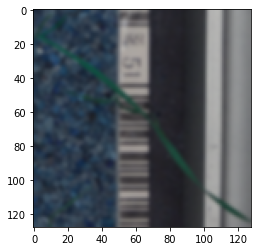

In [131]:
index = 2
plt.imshow(predictionImg[index], cmap='gray')
print("Predicted label:", y_pred[index])


In [132]:
df = pd.DataFrame(filenames, columns=['file'])
df['species'] = y_pred

In [133]:
df.head()

,file,species
0,0050f38b3.png,Loose Silky-bent
1,0183fdf68.png,Loose Silky-bent
2,0260cffa8.png,Black-grass
3,05eedce4d.png,Loose Silky-bent
4,075d004bc.png,Black-grass


In [134]:
df.to_csv(save_extracted+"result.csv", index=False)